In [ ]:
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling
foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset
print(foods_binary)

In [6]:
dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')
print(dis_matrix)


[[0.         0.33333333 0.5        ... 0.375      0.44444444 0.66666667]
 [0.33333333 0.         0.6        ... 0.66666667 0.55555556 0.77777778]
 [0.5        0.6        0.         ... 0.66666667 0.375      0.625     ]
 ...
 [0.375      0.66666667 0.66666667 ... 0.         0.625      0.71428571]
 [0.44444444 0.55555556 0.375      ... 0.625      0.         0.57142857]
 [0.66666667 0.77777778 0.625      ... 0.71428571 0.57142857 0.        ]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1875: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


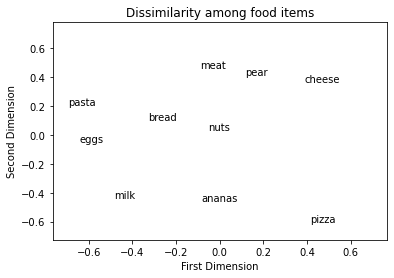

In [3]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(dis_matrix)  
mds_coords = mds_model.fit_transform(dis_matrix) 
                                                                                                                                  
food_names = ['pasta', 'pizza', 'meat', 'eggs', 'cheese', 'ananas', 'pear', 'bread', 'nuts', 'milk']
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among food items')    
plt.show()

In [ ]:
import pandas as pd
df = pd.DataFrame([['sample_1', 'sample_2', 0.2],
                   ['sample_1', 'sample_3', 0.5],
                   ['sample_2', 'sample_3', 0.3]],
                  columns=['SampleA', 'SampleB', 'Num_Differences'])

In [ ]:
# make unique, sorted, common index
idx = sorted(set(df['SampleA']).union(df['SampleB']))

# reshape
(df.pivot(index='SampleA', columns='SampleB', values='Num_Differences')
   .reindex(index=idx, columns=idx)
   .fillna(0, downcast='infer')
   .pipe(lambda x: x+x.values.T)
 )